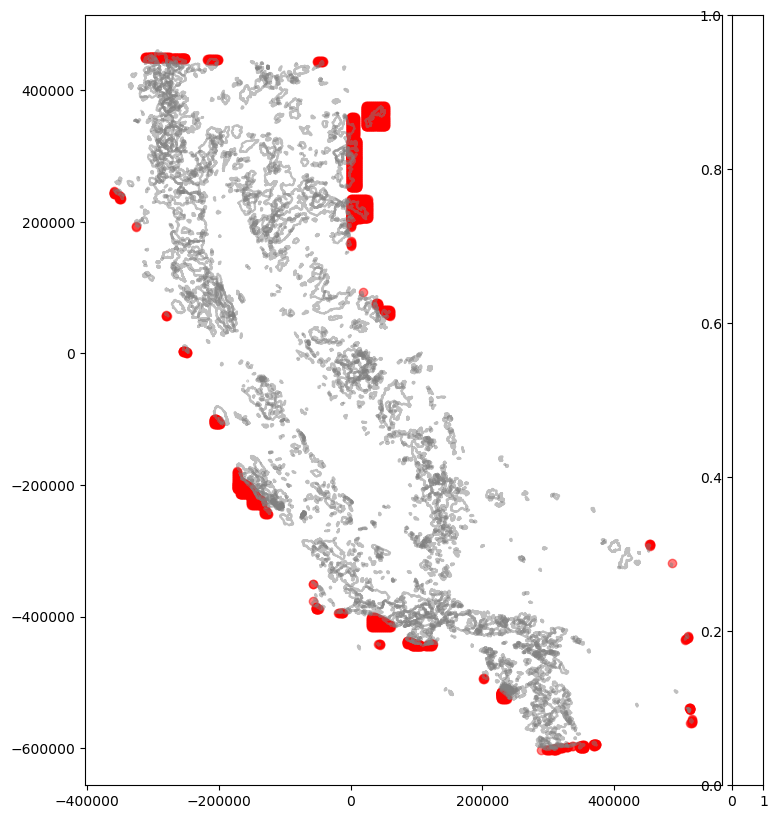

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from prescribed.build.build_data import build_lhs


dvs = build_lhs(
    template_path="/mnt/sherlock/oak/prescribed_data/geoms/templates/template.tif",
    covariates_dict={
        "dnbr": "/mnt/sherlock/oak/prescribed_data/processed/dnbr/dnbr_long.feather",
        "frp": "/mnt/sherlock/oak/prescribed_data/processed/frp/frp_concat.feather",
    },
)

# Load MTBS data
mtbs = gpd.read_file("/mnt/sherlock/oak/prescribed_data/geoms/mtbs_perims_DD_updated/mtbs_perims_DD.shp").to_crs(epsg=3310)
mtbs_ca = mtbs[mtbs.Event_ID.str.startswith("CA")]


weird_points =  dvs["dnbr"][dvs["dnbr"].grid_id.isna()]

# Transform weird points to geodataframe
weird_points = gpd.GeoDataFrame(
    weird_points,
    geometry=gpd.points_from_xy(weird_points.lon, weird_points.lat),
    crs="EPSG:3310",
)

# Plot weird points on top of MTBS data
fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
mtbs_ca.boundary.plot(ax=ax, color="gray", alpha=0.5)
weird_points.plot(ax=ax, color="red", alpha=0.5)
plt.show()